Testing the K Nearest Neighbor Classifier
Tests for methods:
 - Calculation of distances
 - Label prediction
 - Selection of the optimal k

In [43]:
import numpy as np
from sklearn.datasets import make_classification
from knn import KNearestNeighbor 

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

Testing distances

Create test data

In [44]:
X_train = np.array([[1, 2], [3, 4], [5, 6]])
y_train = np.array([0, 1, 0])
X_test = np.array([[2, 3]])


In [45]:
knn = KNearestNeighbor()
knn.fit(X_train, y_train)

In [46]:
def test_distances():
    """Manual calculations for checking distances"""
    # L2 distance between [2,3] and [1,2]: sqrt((1)^2 + (1)^2) = sqrt(2) ≈ 1.4142
    # L2 distance between [2,3] and [3,4]: sqrt((1)^2 + (1)^2) = sqrt(2) ≈ 1.4142
    # L2 distance between [2,3] and [5,6]: sqrt((3)^2 + (3)^2) = sqrt(18) ≈ 4.2426
    
    knn = KNearestNeighbor()
    knn.fit(X_train, y_train)

    dists_two = knn.compute_distances_two_loops(X_test, 'l2')
    assert np.allclose(dists_two[0], [1.4142, 1.4142, 4.2426], atol=0.001)
    
    dists_one = knn.compute_distances_one_loop(X_test, 'l1')
    assert np.allclose(dists_one[0], [2, 2, 6], atol=0.001)
    
    dists_no = knn.compute_distances_no_loops(X_test, 'chebyshev')
    assert np.allclose(dists_no[0], [1, 1, 3], atol=0.001)
    
    print("All distance tests passed!")

test_distances()

All distance tests passed!


Testing predictions

In [47]:
def test_predictions():
    """A simple case test with obvious neighbors"""
    X = np.array([[0], [1], [2], [3]])
    y = np.array([0, 0, 1, 1])
    
    knn = KNearestNeighbor()
    knn.fit(X, y)
    
    # Тест 1: k=1
    assert knn.predict(np.array([[0.5]]), k=1) == 0
    
    # Тест 2: k=3
    assert knn.predict(np.array([[1.5]]), k=3) == 0  
    
    print("All prediction tests passed!")

test_predictions()

All prediction tests passed!


Testing the choice of k

In [48]:
def test_k_selection():
    """A test where the optimal k=3"""
    X, y = make_classification(n_samples=100, n_features=5, random_state=42)
    X_train, X_val = X[:80], X[80:]
    y_train, y_val = y[:80], y[80:]
    
    knn = KNearestNeighbor()
    knn.fit(X_train, y_train)
    
    best_k = knn.choose_best_k(X_val, y_val, k_values=[1, 3, 5], verbose=False)
    
    assert best_k in [1, 3, 5]
    print(f"Best k selected: {best_k} (The test was passed)")

test_k_selection()


Best k selected: 1 (The test was passed)


Boundary cases

In [49]:
def test_edge_cases():
    """Tests for extreme values"""
    X = np.array([[0], [1], [2]])
    y = np.array([1, 1, 1])
    
    knn = KNearestNeighbor()
    knn.fit(X, y)
    assert knn.predict(np.array([[100]]), k=3) == 1
    
    try:
        knn.predict(np.array([[0]]), k=5)
    except ValueError as e:
        assert str(e) == "k cannot be larger than number of training samples"
    
    print("All edge cases tests passed!")

test_edge_cases()

All edge cases tests passed!


Visual demonstration

In [50]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

In [51]:
knn = KNearestNeighbor()
knn.fit(X, y)

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()], k=3)
Z = Z.reshape(xx.shape)



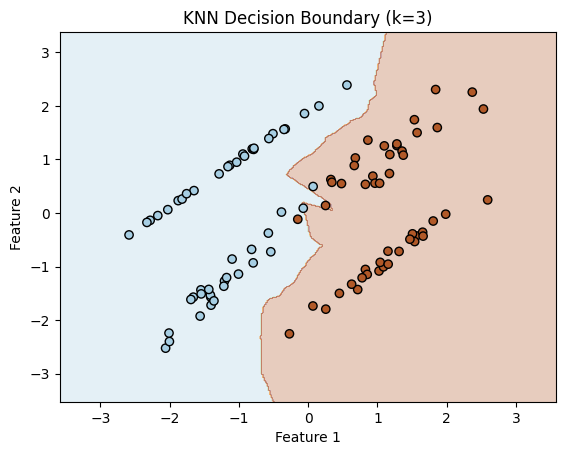

In [53]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary (k=3)")
plt.show()
